### GPU, cuda, gccの確認


In [1]:
!nvidia-smi
!nvcc --version
!gcc --version

Wed Dec  3 11:45:01 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.274.02             Driver Version: 535.274.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              10W /  90W |    334MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### パッケージのインストール / クリーンインストール
ssh先のjupyter環境などで実行の場合は, 当該環境にパッケージをインストール

In [2]:
# クリーンが必要であれば実行
!rm -rf kineticEQ
#!rm -rf build

In [3]:
# インストール
!git clone https://github.com/Minamium/kineticEQ.git
!pip install -e ./kineticEQ

Cloning into 'kineticEQ'...
remote: Enumerating objects: 1370, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 1370 (delta 80), reused 140 (delta 54), pack-reused 1198 (from 1)
Receiving objects: 100% (1370/1370), 6.38 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (703/703), done.
Obtaining file:///home/arlm/workspace/kineticEQ
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for kineticEQ (pyproject.toml) ... done
  Created wheel for kineticEQ: filename=kineticeq-0.4.0-0.editable-py3-none-any.whl size=2710 sha256=6acf1223d6d07f28e8fb0556332049c279f7a6e6cbfbef22fdaa2aa129fd2b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-g5w3ppsm/wheels/5c/8f/4c/777f8eab2b3d762127884b756300580189ab20868ab32d31f6
Successfully built kineticEQ
  Attemp

### 動作確認

--- auto compile ---
--- compile cuSOLVER ---


Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
/home/arlm/workspace/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module gtsv_batch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] c++ -MMD -MF gtsv_binding.o.d -DTORCH_EXTENSION_NAME=gtsv_batch -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -fPIC -std=c++17 -O3 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/gtsv/gtsv_binding.cpp -o gtsv_binding.o 
[2/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output gtsv_batch.cuda.o.d -DTORCH_EXTENSION_NAME=gtsv_batch -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages

Loading extension module gtsv_batch...
Detected CUDA files, patching ldflags
Emitting ninja build file build/build.ninja...
Building extension module lo_blocktridiag...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] c++ -MMD -MF block_tridiag_binding.o.d -DTORCH_EXTENSION_NAME=lo_blocktridiag -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include -isystem /home/arlm/workspace/venv/lib/python3.12/site-packages/torch/include/torch/csrc/api/include -isystem /usr/local/cuda-12.6/include -isystem /usr/include/python3.12 -D_GLIBCXX_USE_CXX11_ABI=1 -fPIC -std=c++17 -O3 -c /home/arlm/workspace/kineticEQ/src/kineticEQ/backends/lo_blocktridiag/block_tridiag_binding.cpp -o block_tridiag_binding.o 
[2/3] /usr/local/cuda-12.6/bin/nvcc --generate-dependencies-with-compile --dependency-output block_tridiag_kernel.cuda.o.d -DTORCH_EXTENSION_NAME=lo_blocktridiag -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1016\" -I/usr/include/python3.12 -isys

Loading extension module lo_blocktridiag...
NoneType: None


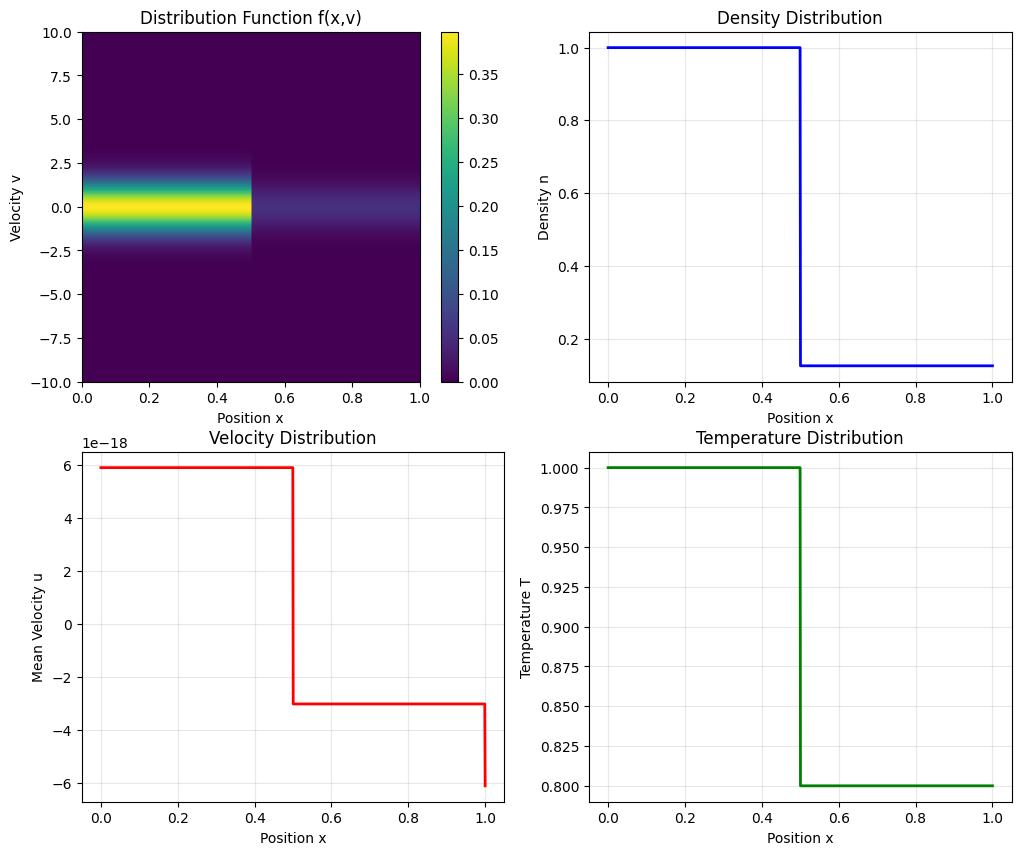

Density: mean=0.5625, min=0.1250, max=1.0000
Velocity: mean=0.0000, min=-0.0000, max=0.0000
Temperature: mean=0.9000, min=0.8000, max=1.0000
--- run simulation ---
--- Starting implicit time evolution ---
CFL number: 4.9950


Implicit Evolution:   0%|          | 0/101 [00:00<?, ?it/s]

Step     0/100 (t=0.000)
Picard iteration:     3, residual: 5.034491e-09
LO iteration: [16, 16, 16], residual: [6.507135114630636e-07, 6.50376896366156e-07, 6.50376906247141e-07]


Implicit Evolution:   9%|▉         | 9/101 [00:00<00:07, 12.03it/s]

Step    10/100 (t=0.005)
Picard iteration:     3, residual: 1.136812e-09
LO iteration: [20, 20, 20], residual: [8.319030791459348e-07, 8.318957757103007e-07, 8.318957372133173e-07]


Implicit Evolution:  19%|█▉        | 19/101 [00:01<00:06, 12.17it/s]

Step    20/100 (t=0.010)
Picard iteration:     3, residual: 8.427094e-10
LO iteration: [19, 19, 19], residual: [9.959751444965637e-07, 9.96136457848129e-07, 9.96136358705213e-07]


Implicit Evolution:  29%|██▊       | 29/101 [00:02<00:05, 12.56it/s]

Step    30/100 (t=0.015)
Picard iteration:     3, residual: 7.802730e-10
LO iteration: [19, 19, 19], residual: [7.1861072786783e-07, 7.185733528758398e-07, 7.185733313375131e-07]


Implicit Evolution:  39%|███▊      | 39/101 [00:03<00:04, 12.67it/s]

Step    40/100 (t=0.020)
Picard iteration:     3, residual: 7.749932e-10
LO iteration: [19, 19, 19], residual: [8.386663699344599e-07, 8.387609646831606e-07, 8.387608942395097e-07]


Implicit Evolution:  49%|████▊     | 49/101 [00:03<00:04, 12.68it/s]

Step    50/100 (t=0.025)
Picard iteration:     3, residual: 6.729728e-10
LO iteration: [19, 19, 19], residual: [6.014844594337543e-07, 6.016545668618978e-07, 6.016544832065929e-07]


Implicit Evolution:  58%|█████▊    | 59/101 [00:04<00:03, 12.63it/s]

Step    60/100 (t=0.030)
Picard iteration:     3, residual: 7.809199e-10
LO iteration: [19, 19, 19], residual: [7.806345209138144e-07, 7.806741118832061e-07, 7.806740622562369e-07]


Implicit Evolution:  68%|██████▊   | 69/101 [00:05<00:02, 12.74it/s]

Step    70/100 (t=0.035)
Picard iteration:     3, residual: 6.347328e-10
LO iteration: [19, 19, 19], residual: [7.190515684818433e-07, 7.191899254466172e-07, 7.191898466207824e-07]


Implicit Evolution:  78%|███████▊  | 79/101 [00:06<00:01, 12.73it/s]

Step    80/100 (t=0.040)
Picard iteration:     3, residual: 7.489767e-10
LO iteration: [19, 19, 19], residual: [6.642032711612345e-07, 6.641829583542425e-07, 6.641829337350469e-07]


Implicit Evolution:  88%|████████▊ | 89/101 [00:07<00:00, 12.79it/s]

Step    90/100 (t=0.045)
Picard iteration:     3, residual: 7.347267e-10
LO iteration: [19, 19, 19], residual: [7.739767491077298e-07, 7.74067818537505e-07, 7.740677525069906e-07]


Implicit Evolution:  98%|█████████▊| 99/101 [00:07<00:00, 12.78it/s]

Step   100/100 (t=0.050)
Picard iteration:     3, residual: 6.564087e-10
LO iteration: [18, 18, 18], residual: [9.692435037067515e-07, 9.694949099359196e-07, 9.69494779817781e-07]


Implicit Evolution: 100%|██████████| 101/101 [00:08<00:00, 12.53it/s]

Time evolution completed!
--- run simulation complete, Result is saved in self.f ---


<Figure size 640x480 with 0 Axes>

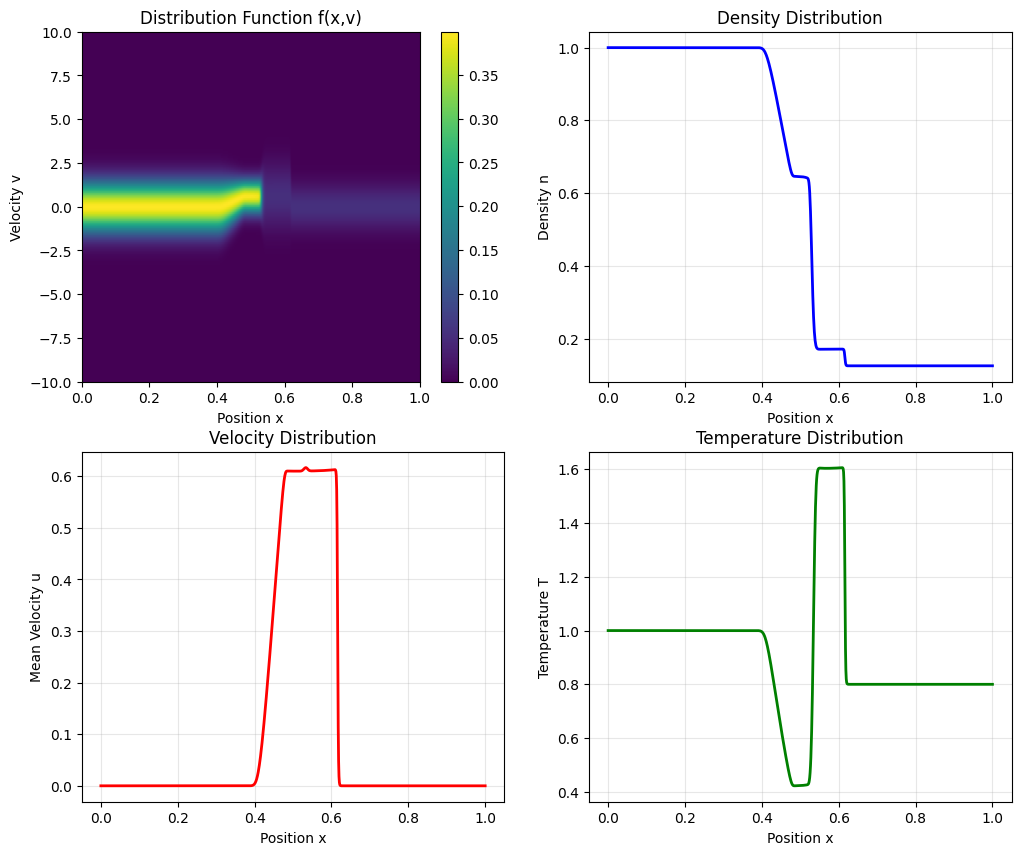

Density: mean=0.5625, min=0.1250, max=1.0000
Velocity: mean=0.1050, min=-0.0000, max=0.6168
Temperature: mean=0.9194, min=0.4222, max=1.6063
Creating GIF with 11 frames...
  Frame 3/11 processed
  Frame 6/11 processed
  Frame 9/11 processed
GIF saved: 'base_bench.gif' (11 frames)


<Figure size 640x480 with 0 Axes>

In [4]:
# import packages
%run kineticEQ/tests/base/base_test.py --T_total 0.05 --tau_tilde 5e-8 --dt 5e-4 --lo_iter 64 --lo_tol 1e-6 --ho_iter 64 --ho_tol 1e-6